In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
mlb = pd.read_csv('final_w_wins.csv')
rec_wins = pd.read_csv('rec_wins.csv')

In [37]:
boston = pd.read_csv('boston_data.csv')
bos_wins = pd.read_csv('boston_wins.csv')

In [38]:
bos = pd.DataFrame(boston.iloc[20,]).reset_index()
cols = ['variable', 'value']
bos.columns = cols
bos = bos[1:]

In [39]:
#bos['Year'] = bos['variable'].apply(lambda x: x.split('_')[0])
bos_wins.columns = cols
bos = pd.concat([bos,bos_wins], ignore_index=True, axis=0)

In [40]:
home_avg = []
away_avg = []
overall_avg = []
home_pct = []
away_pct = []
overall_pct = []
wins = []
year = []
for i in range(2001, 2019):
    i = str(i)
    year.append(i)

for row in bos.iterrows():
    if '2019' not in row[1]['variable'] and '2020' not in row[1]['variable'] and '2021' not in row[1]['variable']:
        if 'AVG_home' in row[1]['variable']:
            home_avg.append(row[1]['value'])
        elif 'AVG_road' in row[1]['variable']:
            away_avg.append(row[1]['value'])
        elif 'AVG_overall' in row[1]['variable']:
            overall_avg.append(row[1]['value'])
        elif 'PCT_home' in row[1]['variable']:
            home_pct.append(row[1]['value'])
        elif 'PCT_road' in row[1]['variable']:
            away_pct.append(row[1]['value'])
        elif 'PCT_overall' in row[1]['variable']:
            overall_pct.append(row[1]['value'])
        elif row[1]['variable'] in year:
            wins.append(row[1]['value'])
wins = wins[::-1]

In [41]:
bos_dict = {'year' : year, 'home_avg' : home_avg,'away_avg' : away_avg,'overall_avg' : overall_avg,'home_pct' : home_pct,'away_pct' : away_pct,'overall_pct' : overall_pct,'wins' : wins}
bos_df = pd.DataFrame(bos_dict)

In [42]:
bos_df['wins'] = bos_df['wins'].apply(lambda x: int(x))

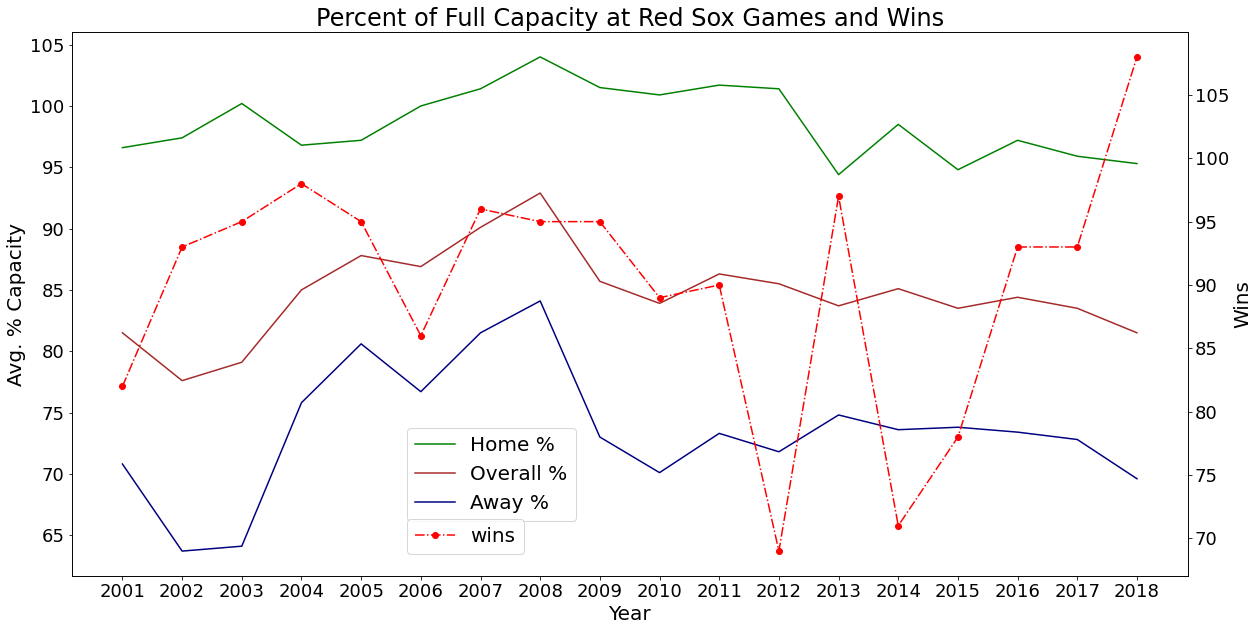

In [43]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(bos_df['year'], bos_df['home_pct'], label = "Home %", color = "green")
ax.plot(bos_df['year'], bos_df['overall_pct'], label = 'Overall %', color = 'brown')
ax.plot(bos_df['year'], bos_df['away_pct'], label = 'Away %', color = 'navy')
ax.set_title('Percent of Full Capacity at Red Sox Games and Wins', fontsize=24)
ax.set_xlabel("Year", fontsize=20)
ax.set_ylabel('Avg. % Capacity', fontsize=20)
ax.tick_params(axis = 'x', labelsize=18)
ax.tick_params(axis = 'y', labelsize=18)
ax.legend(loc=(.3,0.1),prop={'size':20})

ax2 = ax.twinx()
l4=ax2.plot(bos_df['year'], bos_df['wins'], color = 'red', marker = 'o', linestyle = '-.', label = 'wins')
ax2.tick_params(axis = 'y', labelsize=18)
ax2.set_ylabel('Wins', fontsize=20)
ax2.legend(loc=(.3,0.04),prop={'size':20})
plt.savefig('story_chart.png')
plt.show()